In [1]:
import pandas as pd
import numpy as np

import random

import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('train.csv')

workclass 1836

occupation 1843

native.country 583

In [3]:
df_train["workclass"].unique()

array(['Private', 'State-gov', 'Local-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Federal-gov', 'Without-pay', nan, 'Never-worked'],
      dtype=object)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17480 entries, 0 to 17479
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              17480 non-null  int64 
 1   age             17480 non-null  int64 
 2   workclass       15644 non-null  object
 3   fnlwgt          17480 non-null  int64 
 4   education       17480 non-null  object
 5   education.num   17480 non-null  int64 
 6   marital.status  17480 non-null  object
 7   occupation      15637 non-null  object
 8   relationship    17480 non-null  object
 9   race            17480 non-null  object
 10  sex             17480 non-null  object
 11  capital.gain    17480 non-null  int64 
 12  capital.loss    17480 non-null  int64 
 13  hours.per.week  17480 non-null  int64 
 14  native.country  16897 non-null  object
 15  target          17480 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 2.1+ MB


In [5]:
df = df_train.dropna(axis = 0)

In [6]:
df[(df["target"] == 1)&(df["sex"]=="Male")]["education.num"].unique()

array([10, 15,  7, 13,  9, 16, 14,  5,  4, 11, 12,  6,  8,  3,  2])

## workclass

In [7]:
# 타겟이 1이고 남자의 학력별 채워넣기 부분 분석
for i in df[(df["target"] == 1)&(df["sex"]=="Male")]['education.num'].unique():
    
    work_list = df[(df["target"] == 1)&(df["sex"]=="Male")&(df["education.num"]==i)]['workclass'].unique()
    
    for idx in df_train[(df_train["workclass"].isnull())&(df_train["sex"]=="Male")&(df_train["education.num"]==i)&(df_train["target"]==1)].index:
        df_train.loc[idx,"workclass"] = random.choice(work_list)

In [8]:
# 타겟이 1이고 여자의 학력별 채워넣기 부분 분석
for i in df[(df["target"] == 1)&(df["sex"]=="Female")]['education.num'].unique():
    
    work_list = df[(df["target"] == 1)&(df["sex"]=="Female")&(df["education.num"]==i)]['workclass'].unique()
    
    for idx in df_train[(df_train["workclass"].isnull())&(df_train["sex"]=="Female")&(df_train["education.num"]==i)&(df_train["target"]==1)].index:
        df_train.loc[idx,"workclass"] = random.choice(work_list)

In [9]:
# 타겟이 0이고 남자의 학력별 채워넣기 부분 분석
for i in df[(df["target"] == 0)&(df["sex"]=="Male")]['education.num'].unique():
    
    work_list = df[(df["target"] == 0)&(df["sex"]=="Male")&(df["education.num"]==i)]['workclass'].unique()
    
    for idx in df_train[(df_train["workclass"].isnull())&(df_train["sex"]=="Male")&(df_train["education.num"]==i)&(df_train["target"]==0)].index:
        df_train.loc[idx,"workclass"] = random.choice(work_list)

In [10]:
# 타겟이 0이고 여자 학력별 채워넣기 부분 분석
for i in df[(df["target"] == 0)&(df["sex"]=="Female")]['education.num'].unique():
    
    work_list = df[(df["target"] == 0)&(df["sex"]=="Female")&(df["education.num"]==i)]['workclass'].unique()
    
    for idx in df_train[(df_train["workclass"].isnull())&(df_train["sex"]=="Female")&(df_train["education.num"]==i)&(df_train["target"]==0)].index:
        df_train.loc[idx,"workclass"] = random.choice(work_list)

In [11]:
import seaborn as sns

<AxesSubplot:xlabel='workclass', ylabel='count'>

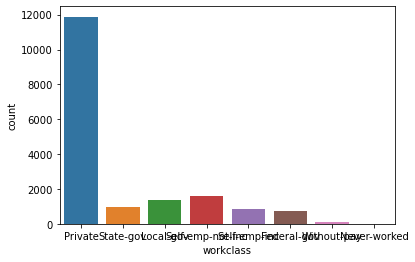

In [12]:
sns.countplot(data=df_train, x= "workclass")

## occupation

In [13]:
for i in df[(df["target"] == 1)&(df["sex"]=="Male")]['education.num'].unique():
    work_list = df[(df["target"] == 1)&(df["sex"]=="Male")&(df["education.num"]==i)]['workclass'].unique()
    for work in work_list:
        jobs = df[(df["workclass"]==work)&(df["sex"]=="Male")&(df["target"]==1)&(df["education.num"]==i)]["occupation"].unique()
        for idx in df_train[(df_train["workclass"]==work)&(df_train["occupation"].isnull())&(df_train["sex"]=="Male")&(df_train["education.num"]==i)&(df_train["target"]==1)].index:
            df_train.loc[idx,"occupation"] = random.choice(jobs)

In [14]:
for i in df[(df["target"] == 0)&(df["sex"]=="Male")]['education.num'].unique():
    work_list = df[(df["target"] == 0)&(df["sex"]=="Male")&(df["education.num"]==i)]['workclass'].unique()
        
    for work in work_list:
        jobs = df[(df["workclass"]==work)&(df["sex"]=="Male")&(df["target"]==0)&(df["education.num"]==i)]["occupation"].unique()
            
        for idx in df_train[(df_train["workclass"]==work)&(df_train["occupation"].isnull())&(df_train["sex"]=="Male")&(df_train["education.num"]==i)&(df_train["target"]==0)].index:
            df_train.loc[idx,"occupation"] = random.choice(jobs)

In [15]:
for i in df[(df["target"] == 1)&(df["sex"]=="Female")]['education.num'].unique():
    work_list = df[(df["target"] == 1)&(df["sex"]=="Female")&(df["education.num"]==i)]['workclass'].unique()
        
    for work in work_list:
        jobs = df[(df["workclass"]==work)&(df["sex"]=="Female")&(df["target"]==1)&(df["education.num"]==i)]["occupation"].unique()
            
        for idx in df_train[(df_train["workclass"]==work)&(df_train["occupation"].isnull())&(df_train["sex"]=="Female")&(df_train["education.num"]==i)&(df_train["target"]==1)].index:
            df_train.loc[idx,"occupation"] = random.choice(jobs)

In [16]:
for i in df[(df["target"] == 0)&(df["sex"]=="Female")]['education.num'].unique():
    work_list = df[(df["target"] == 0)&(df["sex"]=="Female")&(df["education.num"]==i)]['workclass'].unique()
        
    for work in work_list:
        jobs = df[(df["workclass"]==work)&(df["sex"]=="Female")&(df["target"]==0)&(df["education.num"]==i)]["occupation"].unique()
            
        for idx in df_train[(df_train["workclass"]==work)&(df_train["occupation"].isnull())&(df_train["sex"]=="Female")&(df_train["education.num"]==i)&(df_train["target"]==0)].index:
            df_train.loc[idx,"occupation"] = random.choice(jobs)

In [17]:
for idx in df_train[(df_train["workclass"] == "Never-worked")].index:
    df_train.loc[idx,"occupation"] = "No-job"

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17480 entries, 0 to 17479
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              17480 non-null  int64 
 1   age             17480 non-null  int64 
 2   workclass       17480 non-null  object
 3   fnlwgt          17480 non-null  int64 
 4   education       17480 non-null  object
 5   education.num   17480 non-null  int64 
 6   marital.status  17480 non-null  object
 7   occupation      17480 non-null  object
 8   relationship    17480 non-null  object
 9   race            17480 non-null  object
 10  sex             17480 non-null  object
 11  capital.gain    17480 non-null  int64 
 12  capital.loss    17480 non-null  int64 
 13  hours.per.week  17480 non-null  int64 
 14  native.country  16897 non-null  object
 15  target          17480 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 2.1+ MB


In [19]:
# # train 데이터 결측값 소득이 1이면 private

# for idx in df_train[(df_train["workclass"].isnull()) & (df_train["target"] == 1)].index:
#     df_train.loc[idx,"workclass"] = "Private"

# for idx in df_train[(df_train["workclass"].isnull()) & (df_train["target"] == 0)].index:
#     df_train.loc[idx,"workclass"] = "Private"

In [ ]:
# rich_male_job_list = ["Exec-managerial","Prof-specialty","Craft-repair","Sales"]

# for idx in df_train[(df_train["occupation"].isnull())&(df_train["sex"]=="Male")&(df_train["target"]==1)].index:
#     df_train.loc[idx,"occupation"] = random.choice(rich_male_job_list)

In [ ]:
# poor_male_job_list = df_train[(df_train["workclass"]=="Private")&(df_train["sex"]=="Male")&(df_train["target"]==0)]["occupation"].unique()[0:10]

# for idx in df_train[(df_train["occupation"].isnull())&(df_train["sex"]=="Male")&(df_train["target"]==0)].index:
#     df_train.loc[idx,"occupation"] = random.choice(poor_male_job_list)

In [ ]:
# poor_female_job_list = ["Adm-clerical","Other-service","Sales","Prof-specialty","Exec-managerial"]

# for idx in df_train[(df_train["occupation"].isnull())&(df_train["sex"]=="Female")&(df_train["target"]==0)].index:
#     df_train.loc[idx,"occupation"] = random.choice(poor_female_job_list)

In [ ]:
# rich_female_job_list = ["Adm-clerical","Prof-specialty","Exec-managerial"]

# for idx in df_train[(df_train["occupation"].isnull())&(df_train["sex"]=="Female")&(df_train["target"]==1)].index:
#     df_train.loc[idx,"occupation"] = random.choice(rich_female_job_list)

In [20]:
for idx in df_train[df_train["native.country"].isnull()].index:
    df_train.loc[idx,"native.country"] = "United-States"

In [21]:
df_train.drop("id",axis=1,inplace=True)

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17480 entries, 0 to 17479
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             17480 non-null  int64 
 1   workclass       17480 non-null  object
 2   fnlwgt          17480 non-null  int64 
 3   education       17480 non-null  object
 4   education.num   17480 non-null  int64 
 5   marital.status  17480 non-null  object
 6   occupation      17480 non-null  object
 7   relationship    17480 non-null  object
 8   race            17480 non-null  object
 9   sex             17480 non-null  object
 10  capital.gain    17480 non-null  int64 
 11  capital.loss    17480 non-null  int64 
 12  hours.per.week  17480 non-null  int64 
 13  native.country  17480 non-null  object
 14  target          17480 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 2.0+ MB


In [24]:
encoder1 = LabelEncoder()
df_train['workclass'] = encoder1.fit_transform(df_train['workclass'].values)

In [25]:
encoder2 = LabelEncoder()
df_train['marital.status'] = encoder2.fit_transform(df_train['marital.status'].values)

In [26]:
encoder3 = LabelEncoder()
df_train['occupation'] = encoder3.fit_transform(df_train['occupation'].values)

In [27]:
encoder4 = LabelEncoder()
df_train['relationship'] = encoder4.fit_transform(df_train['relationship'].values)

In [28]:
encoder5 = LabelEncoder()
df_train['race'] = encoder5.fit_transform(df_train['race'].values)

In [29]:
encoder6 = LabelEncoder()
df_train['sex'] = encoder6.fit_transform(df_train['sex'].values)

In [30]:
encoder7 = LabelEncoder()
df_train['native.country'] = encoder7.fit_transform(df_train['native.country'].values)

In [31]:
df_train.drop("education",axis=1,inplace=True)

In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17480 entries, 0 to 17479
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             17480 non-null  int64
 1   workclass       17480 non-null  int64
 2   fnlwgt          17480 non-null  int64
 3   education.num   17480 non-null  int64
 4   marital.status  17480 non-null  int64
 5   occupation      17480 non-null  int64
 6   relationship    17480 non-null  int64
 7   race            17480 non-null  int64
 8   sex             17480 non-null  int64
 9   capital.gain    17480 non-null  int64
 10  capital.loss    17480 non-null  int64
 11  hours.per.week  17480 non-null  int64
 12  native.country  17480 non-null  int64
 13  target          17480 non-null  int64
dtypes: int64(14)
memory usage: 1.9 MB


In [33]:
# fig,ax = plt.subplots()
# ax.boxplot(df_train["hours.per.week"])
# plt.show()

In [34]:
# Q3,Q1 = np.percentile(df_train["hours.per.week"],[75,25])
# IQR = Q3-Q1
# IQR

In [35]:
# data = df_train["hours.per.week"]
# for idx in data[(Q1-1.5*IQR>data) | (Q3 +1.5*IQR<data)].index:
#     df_train.drop(idx, axis=0, inplace = True)

In [36]:
# df_train["hours.per.week"].value_counts()

In [37]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = RobustScaler()
scaler2 = StandardScaler()
scaler.fit(df_train.drop('target',axis=1))
scaler2.fit(df_train.drop('target',axis=1))

StandardScaler()

In [39]:
df_train_StandardScaler = scaler2.transform(df_train.drop('target',axis=1))

In [41]:
df_train_RobustScaler = scaler.transform(df_train.drop('target',axis=1))

In [42]:
import optuna

In [43]:
from lightgbm import LGBMClassifier

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
import joblib

In [46]:
train_X = df_train_RobustScaler
train_y = df_train.loc[:,"target"]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(train_X,
                                                    train_y,
                                                    test_size= 0.2,
                                                    random_state=1234,
                                                    stratify=train_y)

In [48]:
from sklearn.model_selection import KFold

In [49]:
kfold = KFold(n_splits = 5, random_state=1234,shuffle=True )

In [50]:
# 대충 돌릴때 체크 : cross-val
from sklearn.model_selection import cross_val_score

# 평가
from sklearn.metrics import accuracy_score

In [51]:
lgbm = LGBMClassifier(n_jobs=-1, random_state=1234)
scores = cross_val_score(lgbm, X_train, y_train ,
                         cv=kfold, scoring="accuracy")
for iter_count, acc in enumerate(scores):
    print("K-Fold {0}번째 검증 정확도 : {1:.4f}".format(iter_count,acc ))
print("K-Fold 평균 정확도 :", scores.mean())

K-Fold 0번째 검증 정확도 : 0.8620
K-Fold 1번째 검증 정확도 : 0.8602
K-Fold 2번째 검증 정확도 : 0.8663
K-Fold 3번째 검증 정확도 : 0.8681
K-Fold 4번째 검증 정확도 : 0.8691
K-Fold 평균 정확도 : 0.8651318626179798


In [52]:
def objective_lgbm(trial) :
    params = {
      "boosting": trial.suggest_categorical("boosting_type",['gbdt','dart','goss']),
      "num_leaves" : trial.suggest_int("num_leaves",2,2^9),
      "max_depth" : trial.suggest_int("max_depth",1,20),
      "learning_rate" : trial.suggest_uniform("learning_rate",0.01,0.5),
      "n_estimators" : trial.suggest_int("n_estimators",100, 3000),
      "min_child_weight" : trial.suggest_float("min_child_weight",0.1,0.9 ),
      "min_child_samples" : trial.suggest_int("min_child_samples",2,50) ,
      "subsample" : trial.suggest_uniform("subsample",0.1,1),
      "reg_alpha":trial.suggest_loguniform("reg_alpha",1e-6, 1e3), #10의 마이너스 6승부터 1000까지 
      "reg_lambda":trial.suggest_loguniform("reg_lambda",1e-6,1e3)  
      }
    lgbm = LGBMClassifier(**params, n_jobs=-1,random_state=1234)
  # 3. Cross-Val 진행
    scores = cross_val_score( lgbm, X_train, y_train, cv=kfold, scoring="accuracy")

    acc_mean = scores.mean()
  # 4. target -> return
    return acc_mean
  
lgbm_study = optuna.create_study(direction="maximize")

lgbm_study.optimize(objective_lgbm,n_trials=50)

[I 2022-04-28 15:03:50,478] A new study created in memory with name: no-name-615369ed-60a5-4be7-a463-c85e3a43b5dd
[I 2022-04-28 15:06:04,412] Trial 0 finished with value: 0.85976884593804 and parameters: {'boosting_type': 'dart', 'num_leaves': 5, 'max_depth': 15, 'learning_rate': 0.2820407871435899, 'n_estimators': 1915, 'min_child_weight': 0.492464335983268, 'min_child_samples': 33, 'subsample': 0.5188912375318303, 'reg_alpha': 16.529638093263273, 'reg_lambda': 0.00010046440444626717}. Best is trial 0 with value: 0.85976884593804.
[I 2022-04-28 15:07:29,820] Trial 1 finished with value: 0.8473258953620346 and parameters: {'boosting_type': 'dart', 'num_leaves': 3, 'max_depth': 20, 'learning_rate': 0.3178983698949784, 'n_estimators': 2008, 'min_child_weight': 0.7875073613630613, 'min_child_samples': 38, 'subsample': 0.40612847933875174, 'reg_alpha': 94.51928884513423, 'reg_lambda': 3.8928865557489374}. Best is trial 0 with value: 0.85976884593804.
[I 2022-04-28 15:07:48,935] Trial 2 fin

[I 2022-04-28 15:20:39,893] Trial 19 finished with value: 0.8128579670738574 and parameters: {'boosting_type': 'goss', 'num_leaves': 9, 'max_depth': 9, 'learning_rate': 0.4900754710513354, 'n_estimators': 2913, 'min_child_weight': 0.41010580473237235, 'min_child_samples': 14, 'subsample': 0.6767824903368144, 'reg_alpha': 0.00933965158376114, 'reg_lambda': 0.0035985685023617476}. Best is trial 4 with value: 0.8656327825183634.
[I 2022-04-28 15:20:57,318] Trial 20 finished with value: 0.8601261672658678 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 10, 'max_depth': 5, 'learning_rate': 0.2304780053517681, 'n_estimators': 2666, 'min_child_weight': 0.2002221949234207, 'min_child_samples': 33, 'subsample': 0.49343160898555505, 'reg_alpha': 1.2057066926156046e-06, 'reg_lambda': 100.93045976301718}. Best is trial 4 with value: 0.8656327825183634.
[I 2022-04-28 15:21:15,832] Trial 21 finished with value: 0.8638448460260151 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 9, 'ma

[I 2022-04-28 15:46:38,670] Trial 38 finished with value: 0.8668486519636049 and parameters: {'boosting_type': 'dart', 'num_leaves': 10, 'max_depth': 12, 'learning_rate': 0.12566234559936074, 'n_estimators': 388, 'min_child_weight': 0.6559399415663526, 'min_child_samples': 34, 'subsample': 0.36695634115311476, 'reg_alpha': 0.0051063400825797755, 'reg_lambda': 0.11386675096959514}. Best is trial 26 with value: 0.8685645462157237.
[I 2022-04-28 15:48:03,434] Trial 39 finished with value: 0.8678495966708659 and parameters: {'boosting_type': 'dart', 'num_leaves': 8, 'max_depth': 8, 'learning_rate': 0.1792471385596145, 'n_estimators': 973, 'min_child_weight': 0.5682339088763595, 'min_child_samples': 27, 'subsample': 0.5596964686529845, 'reg_alpha': 0.12282321523633795, 'reg_lambda': 2.0487908869221276}. Best is trial 26 with value: 0.8685645462157237.
[I 2022-04-28 15:48:20,853] Trial 40 finished with value: 0.8464677052820235 and parameters: {'boosting_type': 'goss', 'num_leaves': 9, 'max_

In [53]:
print(lgbm_study.best_params) # xgbc_study.best_trail.params
print("------------")
print(lgbm_study.best_value)

{'boosting_type': 'dart', 'num_leaves': 11, 'max_depth': 12, 'learning_rate': 0.0728546017718334, 'n_estimators': 1676, 'min_child_weight': 0.8198420531283602, 'min_child_samples': 30, 'subsample': 0.4506369638789091, 'reg_alpha': 7.152969365995392e-05, 'reg_lambda': 0.1179859284421532}
------------
0.8685645462157237


In [54]:
optimized_lgbm = LGBMClassifier( 
                        boosting=lgbm_study.best_params["boosting_type"],
                        num_leaves = lgbm_study.best_params["num_leaves"],
                        max_depth = lgbm_study.best_params["max_depth"],
                        learning_rate = lgbm_study.best_params["learning_rate"],
                        n_estimators = lgbm_study.best_params["n_estimators"],
                        min_child_weight = lgbm_study.best_params["min_child_weight"],
                        min_child_samples = lgbm_study.best_params["min_child_samples"],
                        subsample = lgbm_study.best_params["subsample"],
                        reg_alpha = lgbm_study.best_params["reg_alpha"],
                        reg_lambda = lgbm_study.best_params["reg_lambda"],
                        n_jobs= -1,
                        random_state=1234)
optimized_lgbm.fit(X_train, y_train)
accuracy_score(y_test, optimized_lgbm.predict(X_test))

0.8810068649885584

In [ ]:
# 0.8801487414187643

예측 시작

In [55]:
df_test = pd.read_csv('test.csv')
df_test

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0,47,Private,304133,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
1,1,34,Self-emp-inc,154227,Some-college,10,Never-married,Sales,Not-in-family,White,Male,0,0,75,United-States
2,2,31,Local-gov,158291,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,8614,0,40,United-States
3,3,28,Private,183155,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,55,United-States
4,4,54,Local-gov,182543,Some-college,10,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15076,15076,30,Local-gov,182926,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Male,15024,0,40,United-States
15077,15077,39,Private,176101,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
15078,15078,48,Private,242406,11th,7,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,Puerto-Rico
15079,15079,44,Private,100584,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States


In [56]:
df_test.drop("id",axis=1,inplace=True)

In [57]:
df_test['workclass'] = encoder1.fit_transform(df_test['workclass'].values)
df_test['marital.status'] = encoder2.fit_transform(df_test['marital.status'].values)
df_test['occupation'] = encoder3.fit_transform(df_test['occupation'].values)
df_test['relationship'] = encoder4.fit_transform(df_test['relationship'].values)
df_test['race'] = encoder5.fit_transform(df_test['race'].values)
df_test['sex'] = encoder6.fit_transform(df_test['sex'].values)
df_test['native.country'] = encoder7.fit_transform(df_test['native.country'].values)
df_test.drop("education",axis=1,inplace=True)

In [58]:
df_test_StandardScaler = scaler.transform(df_test)



In [59]:
# 일단 가장 높은 정화도인 lgbm으로 예측

In [60]:
result = optimized_lgbm.predict(df_test_StandardScaler)

In [61]:
result

array([1, 0, 1, ..., 0, 0, 0])

In [62]:
submission = pd.read_csv("sample_submission.csv")

In [63]:
submission["target"] = result

In [64]:
submission.to_csv("submission_2.csv",index=False)

In [ ]:
submission

In [ ]:
import collections

In [ ]:
def vote_handmade(x):
    p = collections.Counter(x) 
    if p.most_common()[0][1] >= 2:
        return p.most_common()[0][0]
    else:
        print("Check!!!!")
        return x[0]

In [ ]:
X_test_model_total = df_test.copy(deep=True)
X_test_model_total["rf"] = optimized_rf.predict(df_test)
X_test_model_total["xgb"] = optimized_xgbc.predict(df_test)
X_test_model_total["lgb"] = optimized_lgbm.predict(df_test)
X_test_model_total.head()

In [ ]:
X_test_model_total["hard_voting"] = X_test_model_total.loc[:, ["rf","xgb","lgb"]].apply(lambda x : vote_handmade(x),axis=1)
X_test_model_total.head()

In [ ]:
submission = pd.read_csv("/content/drive/MyDrive/소득예측경진대회/sample_submission.csv")

In [ ]:
submission["target"] = X_test_model_total["hard_voting"]

In [ ]:
submission.to_csv("submission_voting.csv",index=False)